In [30]:
import pandas as pd

df = pd.read_csv("Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [31]:
print(df.shape)
print(df.info())
print(df.describe())


(6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000 

In [32]:
print(df.isnull().sum())

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64


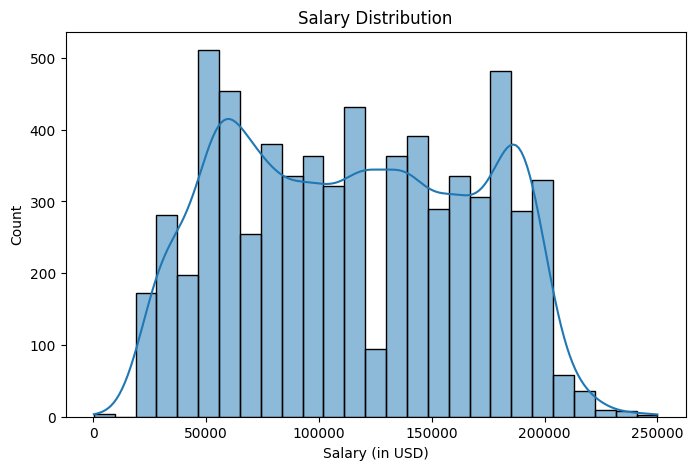

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Salary distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Salary"], kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (in USD)")
plt.show()

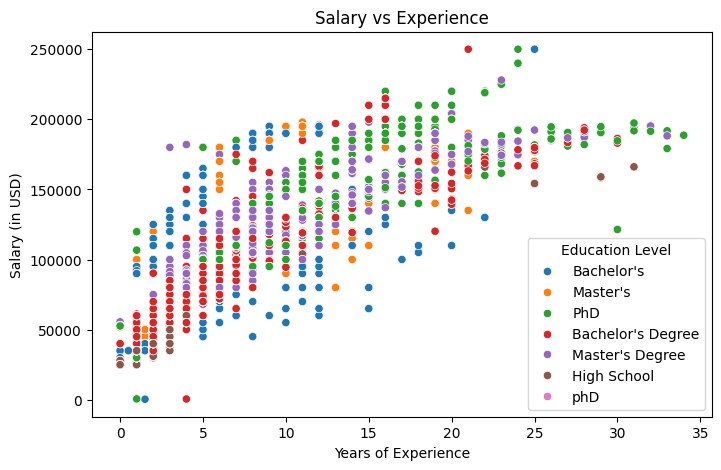

In [34]:
# Salary vs Experience
plt.figure(figsize=(8,5))
sns.scatterplot(x="Years of Experience", y="Salary", data=df, hue="Education Level")
plt.title("Salary vs Experience")
plt.ylabel("Salary (in USD)")
plt.show()

In [35]:
print(df["Education Level"].value_counts())


Education Level
Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: count, dtype: int64


In [36]:
# Define mapping
education_mapping = {
    "Bachelor's Degree": "Bachelor's",
    "Master's Degree": "Master's",
    "Bachelor's": "Bachelor's",
    "Master's": "Master's",
    "PhD": "phD",   
    "High School": "High School",   
}

# Apply mapping
df["Education Level"] = df["Education Level"].map(education_mapping)

# Confirm changes
print(df["Education Level"].value_counts())


Education Level
Bachelor's     3023
Master's       1861
phD            1368
High School     448
Name: count, dtype: int64


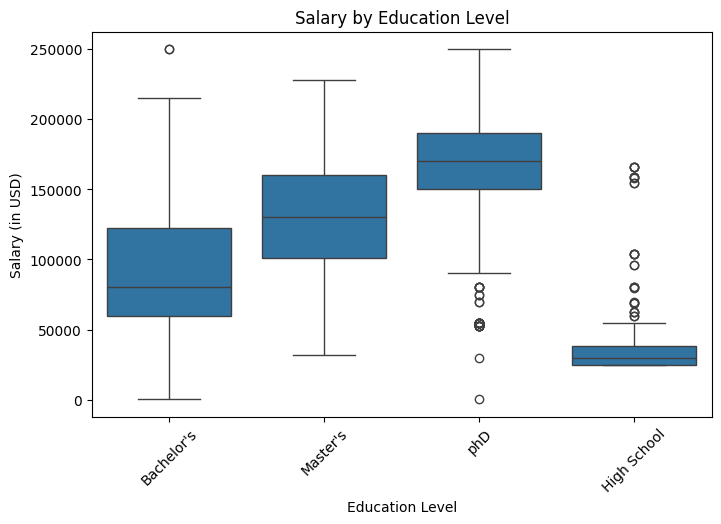

In [37]:
# Boxplot: Salary by Education Level
plt.figure(figsize=(8,5))
sns.boxplot(x="Education Level", y="Salary", data=df)
plt.title("Salary by Education Level")
plt.ylabel("Salary (in USD)")
plt.xticks(rotation=45)
plt.show()

In [38]:
print(df["Job Title"].value_counts())

Job Title
Software Engineer                 518
Data Scientist                    453
Software Engineer Manager         376
Data Analyst                      363
Senior Project Engineer           318
                                 ... 
Junior Social Media Specialist      1
Senior Software Architect           1
Developer                           1
Social M                            1
Social Media Man                    1
Name: count, Length: 193, dtype: int64


C:\Users\rouna\AppData\Local\Temp\ipykernel_24804\2465574311.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_salary.index, y=top_10_salary.values, palette="viridis")


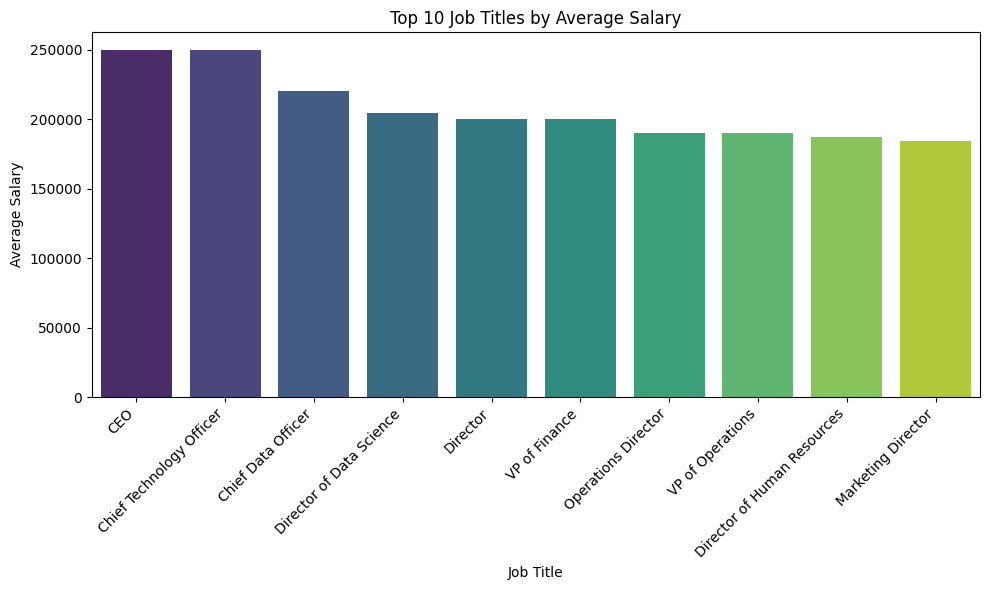

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Calculate average salary per job title
avg_salary_by_title = df.groupby("Job Title")["Salary"].mean().sort_values(ascending=False)

# Step 2: Select top 10 job titles only
top_10_salary = avg_salary_by_title.head(10)

# Step 3: Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_salary.index, y=top_10_salary.values, palette="viridis")
plt.title("Top 10 Job Titles by Average Salary")
plt.xlabel("Job Title")
plt.ylabel("Average Salary")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [40]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,phD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [41]:
# Drop rows with missing values
df.dropna(inplace=True)


In [42]:
features = ["Age", "Gender", "Education Level", "Job Title", "Years of Experience"]
target = "Salary"

X = df[features]
y = df[target]


In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["Gender", "Education Level", "Job Title"]
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), cat_cols)
    ],
    remainder='passthrough'  # numeric columns go through unchanged
)


In [44]:
from sklearn.model_selection import train_test_split

X_encoded = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}


In [46]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results.append({"Model": name, "RMSE": rmse, "R2 Score": r2})

# Show results
import pandas as pd
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


               Model          RMSE  R2 Score
1      Random Forest   8549.894380  0.974263
2  Gradient Boosting  16134.093378  0.908352
0  Linear Regression  21509.564063  0.837109


In [47]:
import pickle

# Save model and preprocessor
best_model = models["Random Forest"]  # change key if another performs better
pickle.dump(best_model, open("best_salary_model.pkl", "wb"))
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))


Cross-Validation (Before Tuning)

In [48]:
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(random_state=42)

# 5-fold CV on training data
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", cv_scores)
print("Average R² Score:", np.mean(cv_scores))


Cross-Validation R² Scores: [0.97108584 0.97026856 0.97915302 0.97316393 0.97812414]
Average R² Score: 0.9743590966774185


Hyperparameter Tuning (Grid Search)

In [49]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated R²:", grid_search.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated R²: 0.9740600990018397


In [ ]:
# Retrain

best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [51]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = best_rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Tuned Model RMSE:", rmse)
print("Tuned Model R²:", r2)


Tuned Model RMSE: 8607.93436600507
Tuned Model R²: 0.9739125778673434


In [53]:
import pickle

pickle.dump(best_rf, open("best_salary_model.pkl", "wb"))
pickle.dump(preprocessor, open("preprocessor.pkl", "wb"))


Feature Importance Visualization

C:\Users\rouna\AppData\Local\Temp\ipykernel_24804\4090174892.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_features, palette="crest")


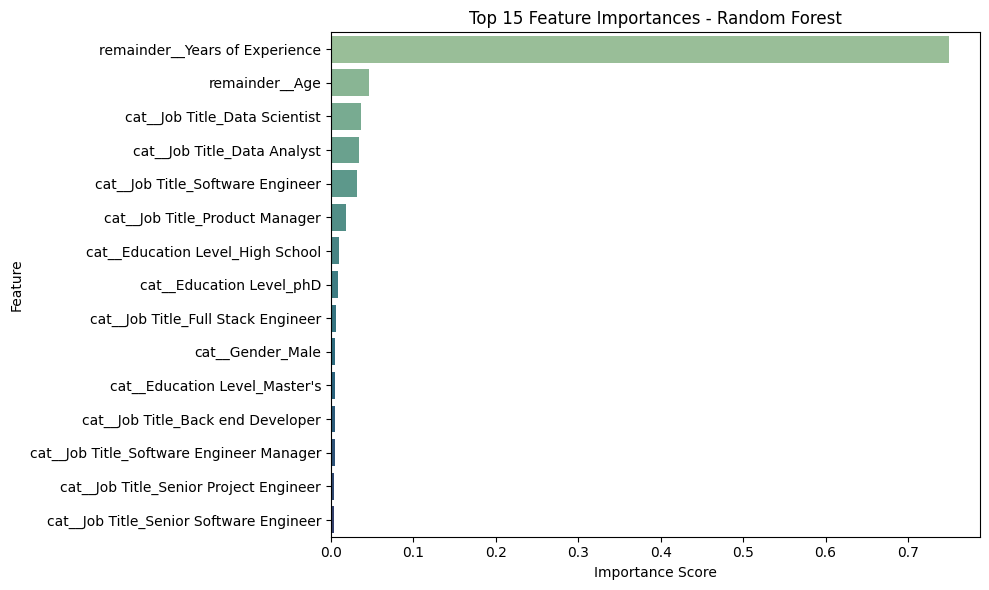

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from trained model
importances = best_rf.feature_importances_

# Get feature names from preprocessor
# This works only if you used ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Sort and keep top 15 important features
top_n = 15
top_features = importance_df.head(top_n)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_features, palette="crest")
plt.title(f"Top {top_n} Feature Importances - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

